In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read kepler CSV
kepler_data = pd.read_csv("CSV-experimental/23-12-12-to-23-12-13_14-43-00.csv", 
                     header=1, # which row contains column headers
                     index_col=0   ) # which column contains labels
#read zeebe CSV
zeebe_data = pd.read_csv("CSV-experimental/23-12-12-to-23-12-13_14-43-00 Job completion per second-data-2023-12-13 14_52_15.csv", 
                     header=1, # which row contains column headers
                     index_col=0   ) # which column contains labels

NameError: name 'cpu_data' is not defined

In [ ]:
# start time 2023-12-13 17:25:00

completion_and_power = pd.DataFrame()

worker_cols = [col for col in kepler_data.columns if 'restworkerjava' in col ]

completion_and_power['power'] = kepler_data[worker_cols].sum(axis=1)
completion_and_power['completion'] = zeebe_data.iloc[:,0]

completion_and_power = completion_and_power[completion_and_power['completion'].notnull() & completion_and_power['completion'] != 0]




<Axes: xlabel='Time'>

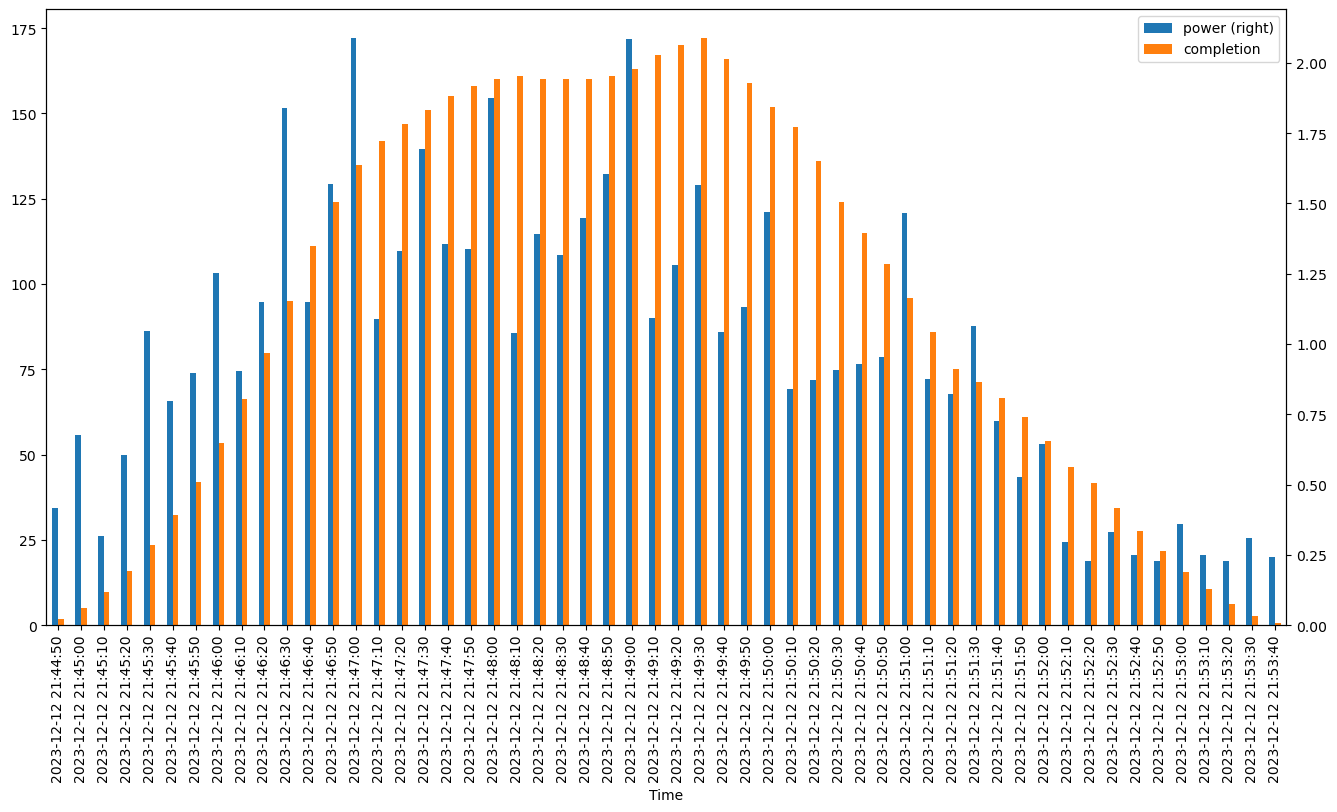

In [ ]:
# plotting
figsize = [16, 8]

completion_and_power.plot(kind="bar", secondary_y='power', figsize=figsize)

In [ ]:
# group in minute-long-buckets

amt_of_minutes = int(len(completion_and_power.index) / 6)

completion_and_power_per_min = pd.DataFrame()

for i in range(0, amt_of_minutes):
    completion_and_power_per_min[completion_and_power.index[i*6]] = completion_and_power.iloc[i*6:(i+1)*6,:].sum(axis=0)

completion_and_power_per_min = completion_and_power_per_min.transpose()

completion_and_power_per_min

,power,completion
2023-12-12 21:44:50,3.8576,88.170
2023-12-12 21:45:50,7.1900,447.400
2023-12-12 21:46:50,9.1269,854.000
2023-12-12 21:47:50,8.4132,959.000
2023-12-12 21:48:50,8.6728,999.000
2023-12-12 21:49:50,6.1510,832.000
2023-12-12 21:50:50,5.9077,501.000
2023-12-12 21:51:50,2.2792,265.000
2023-12-12 21:52:50,1.6180,57.097


<Axes: xlabel='completion', ylabel='power'>

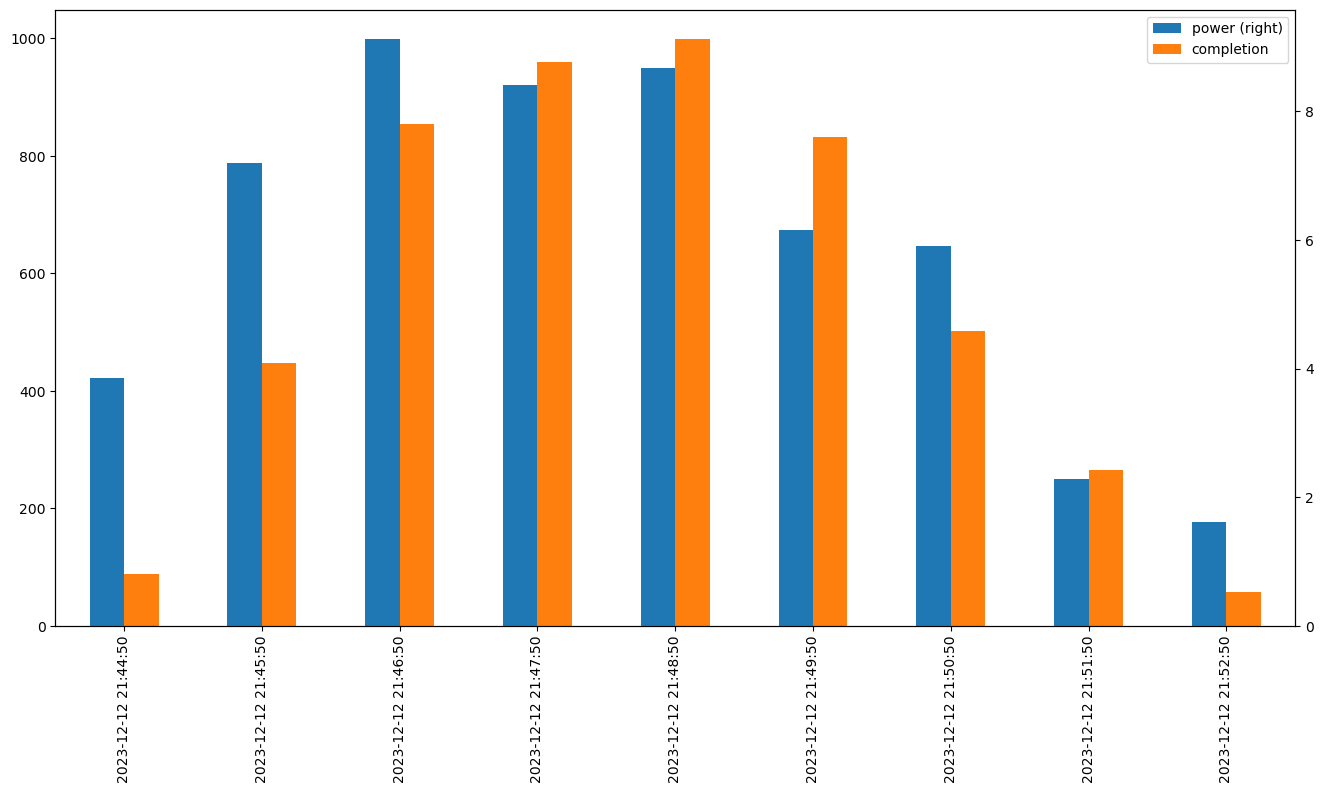

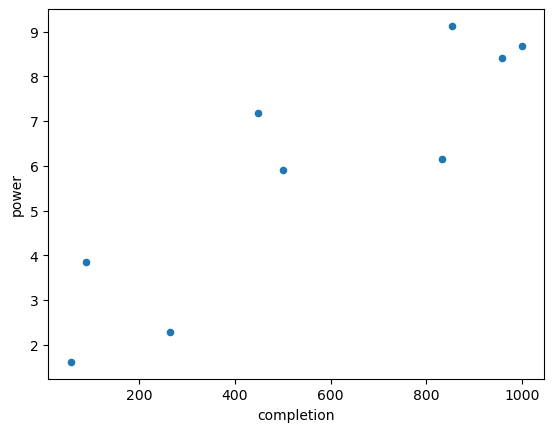

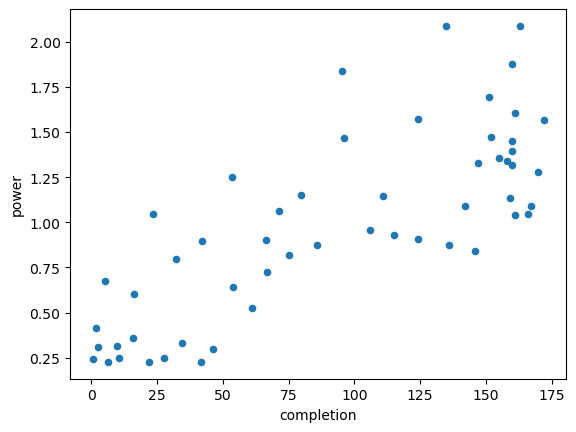

In [ ]:
completion_and_power_per_min.plot(kind="bar", secondary_y='power', figsize=figsize)
completion_and_power_per_min.plot(kind="scatter", x='completion', y='power')
completion_and_power.plot(kind="scatter", x='completion', y='power')